Install some basic libraries

In [1]:
# !python3 -m pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117

# python3 -m pip install timm==0.9.7
# python -m pip install matplotlib tensorboardX Ninja decord gdown termcolor
# python -m pip install scikit-learn tabulate tensorboard lmdb yacs pandas einops
# python -m pip install albumentations h5py scipy
!python -m pip install decord gdown
!python -m pip install openmim
!python -m pip install --upgrade setuptools
# !mim install 'mmcv>=2.0.0'
!mim install 'mmengine'
!mim install 'mmagic'

# !python -m pip install  mmengine 'mmcv>=2.0.0' mmagic
!python -m pip install  mmengine mmagic
!python -m pip install pytorch-msssim jpeg4py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.5/314.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 23.6 MB/s eta 0:00:

In [2]:
!git clone https://github.com/open-mmlab/mmcv.git
!cd mmcv
!MMCV_WITH_OPS=1 python -m pip install -e .
import mmcv
!cd ..

Cloning into 'mmcv'...
remote: Enumerating objects: 17581, done.
remote: Counting objects: 100% (514/514), done.
remote: Compressing objects: 100% (350/350), done.
remote: Total 17581 (delta 357), reused 164 (delta 164), pack-reused 17067 (from 2)
Receiving objects: 100% (17581/17581), 14.50 MiB | 21.33 MiB/s, done.
Resolving deltas: 100% (12797/12797), done.
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [3]:
!python -m pip install opencv-python-headless
import cv2

Mount the google drive (file system for this code session)

In [4]:
# Mount the google drive
# Mount your google drive where you've saved your assignment folder
# Run this block first, then go to the URL it displays and copy the authorization code back.
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
%cd /content/gdrive/MyDrive
!pwd
%mkdir test_run
%cd /content/gdrive/MyDrive/test_run

/content/gdrive/MyDrive
/content/gdrive/MyDrive
/content/gdrive/MyDrive/test_run


Add the video to the above file system (test_run folder in your google drive) : https://drive.google.com/file/d/15lNLJuUqpZxQ5eK8JKFDWnFi9MiKuSpr/view?usp=drive_link



In [6]:
!ls # should show the video here

010-cl-02-090.avi


12/20 15:42:40 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
12/20 15:42:40 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
(97, 256, 256, 3)


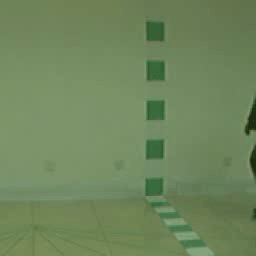

In [7]:
# lets play the video
from PIL import Image
import numpy as np
import h5py
import numpy as np
from IPython.display import Image as gif_player

try:
    from mmcv.fileio import FileClient
except:
    from mmengine.fileio import FileClient

import decord
import io
io_backend='disk'
file_client = FileClient(io_backend)
import os


def gif_generator(video, name="array.gif"):
    images = []
    for img in video:y=Image.fromarray(img);images.append(y)
    images[0].save(name, save_all=True, append_images=images[1:], optimize=False, duration=1000 // 30  , loop=0)


video ="010-cl-02-090.avi"
file_obj = io.BytesIO(file_client.get(video))
container = decord.VideoReader(file_obj, num_threads=1)
indices = [i for i in range(len(container))]
video = container.get_batch([i for i in indices ]).asnumpy()
print(video .shape )
gif_generator(video, name="test.gif")
gif_player(open('test.gif','rb').read())


  Do git clone : https://github.com/Cyang-Zhao/Grad-Eclip

## DO NOT RUN ANY SCRIPT ON THE GITHUB (like demo.py inference.py, etc.)

1. Install requiste libraries
2. Import CLIP Model : https://github.com/openai/CLIP
3. Download pretrained weights for the model
4. Load The Pretriained the weights to the model class (strict = True). All weights should match (if something misses), please let me know immediately.
5. Show a forward Pass (no backpass, or training, just inference) on above video middle RGB frame (middle frame of the above video)
7. Run Grad-Eclip on the CLIP model : https://github.com/Cyang-Zhao/Grad-Eclip
8. Show Heatmap

In [8]:
# Install OpenAI CLIP and dependencies
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-fddi4nzi
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-fddi4nzi
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369549 sha256=a37353f3074b3bc5c106daf753381e44528e1e2993b6ad0594d63a4d1eca66e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-6iumbt02/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [36]:
# GET MIDDLE FRAME
try:
    if 'video' not in globals() or video is None:
        raise NameError("Video variable not found.")
    mid_frame_index = len(video) // 2
    middle_frame = video[mid_frame_index]

    # Check if video is BGR and convert to RGB
    middle_frame = cv2.cvtColor(middle_frame, cv2.COLOR_BGR2RGB)

except Exception as e:
    print(f"Error accessing video variable: {e}")
    middle_frame = np.zeros((224, 224, 3), dtype=np.uint8)

# Ensure middle_frame is uint8 and in the correct range [0, 255]
if middle_frame.dtype != np.uint8:
    # If the frame is float and in range [0, 1], scale it.
    # If it's already [0, 255], just cast it.
    if middle_frame.max() <= 1.0:
        middle_frame = (middle_frame * 255).astype(np.uint8)
    else:
        middle_frame = middle_frame.astype(np.uint8)

middle_frame_pil = Image.fromarray(middle_frame)

# Quick check for the next step:
print(f"Frame prepared: Shape {middle_frame.shape}, Dtype {middle_frame.dtype}")

Frame prepared: Shape (256, 256, 3), Dtype uint8


In [37]:
!pip install open-clip-torch

In [38]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torchvision.transforms as T
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, InterpolationMode

import clip
from open_clip import create_model_from_pretrained

device = "cuda" if torch.cuda.is_available() else "cpu"
clipmodel, preprocess = clip.load("ViT-B/16", device=device)
clip_inres = clipmodel.visual.input_resolution
clip_ksize = clipmodel.visual.conv1.kernel_size

print("[clip resolution]:", clip_inres)
print("[clip kernel size]:", clip_ksize)

[clip resolution]: 224
[clip kernel size]: (16, 16)


In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model
clipmodel, preprocess = clip.load("ViT-B/16", device=device)

# Convert model to float32
# provides better precision for Grad-Eclip calculations.
clipmodel = clipmodel.float()

clip_inres = clipmodel.visual.input_resolution
clip_ksize = clipmodel.visual.conv1.kernel_size

print("[clip resolution]:", clip_inres)
print("[clip kernel size]:", clip_ksize)

# Define imgprocess for use in later cells
imgprocess = preprocess

[clip resolution]: 224
[clip kernel size]: (16, 16)


In [40]:
_transform = Compose([
        ToTensor(),
        Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
    ])
def imgprocess(img, patch_size=[16, 16], scale_factor=1):
    w, h = img.size
    ph, pw = patch_size
    nw = int(w * scale_factor / pw + 0.5) * pw
    nh = int(h * scale_factor / ph + 0.5) * ph

    ResizeOp = Resize((nh, nw), interpolation=InterpolationMode.BICUBIC)
    img = ResizeOp(img).convert("RGB")
    return _transform(img)

def visualize(map, raw_image, resize):
    image = np.asarray(raw_image.copy())
    map = resize(map.unsqueeze(0))[0].cpu().numpy()
    color = cv2.applyColorMap((map*255).astype(np.uint8), cv2.COLORMAP_JET) # cv2 to plt
    color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)
    c_ret = np.clip(image * (1 - 0.5) + color * 0.5, 0, 255).astype(np.uint8)
    return c_ret

In [41]:
def attention_layer(q, k, v, num_heads=12): # Updated to match ViT-B/16
    "Compute 'Scaled Dot Product Attention'"
    tgt_len, bsz, embed_dim = q.shape
    head_dim = embed_dim // num_heads
    scaling = float(head_dim) ** -0.5
    q = q * scaling

    q = q.contiguous().view(tgt_len, bsz * num_heads, head_dim).transpose(0, 1)
    k = k.contiguous().view(-1, bsz * num_heads, head_dim).transpose(0, 1)
    v = v.contiguous().view(-1, bsz * num_heads, head_dim).transpose(0, 1)

    attn_output_weights = torch.bmm(q, k.transpose(1, 2))
    attn_output_weights = F.softmax(attn_output_weights, dim=-1)
    attn_output_heads = torch.bmm(attn_output_weights, v)

    attn_output = attn_output_heads.transpose(0, 1).contiguous().view(tgt_len, bsz, embed_dim)
    attn_output_weights = attn_output_weights.view(bsz, num_heads, tgt_len, -1)
    attn_output_weights = attn_output_weights.sum(dim=1) / num_heads
    return attn_output, attn_output_weights

def clip_encode_dense(x, n):
    # Ensure input is float32 to match the model we set to .float() earlier
    x = x.to(device=device, dtype=torch.float32)

    vision_width = clipmodel.visual.transformer.width
    vision_heads = clipmodel.visual.transformer.resblocks[0].attn.num_heads
    print("[vision_width and vision_heads]:", vision_width, vision_heads)

    # Convolutional Patch Embedding
    x = clipmodel.visual.conv1(x)
    feah, feaw = x.shape[-2:]

    x = x.reshape(x.shape[0], x.shape[1], -1)
    x = x.permute(0, 2, 1)

    # Match class_embedding type to input x
    class_embedding = clipmodel.visual.class_embedding.to(x.dtype)
    x = torch.cat([class_embedding + torch.zeros(x.shape[0], 1, x.shape[-1], device=x.device, dtype=x.dtype), x], dim=1)

    ## Scale position embedding
    pos_embedding = clipmodel.visual.positional_embedding.to(x.dtype)
    tok_pos, img_pos = pos_embedding[:1, :], pos_embedding[1:, :]

    # Calculate grid size based on kernel size (usually 16x16)
    pos_h = clip_inres // clip_ksize[0]
    pos_w = clip_inres // clip_ksize[1]

    img_pos = img_pos.reshape(1, pos_h, pos_w, img_pos.shape[1]).permute(0, 3, 1, 2)
    img_pos = torch.nn.functional.interpolate(img_pos, size=(feah, feaw), mode='bicubic', align_corners=False)
    img_pos = img_pos.reshape(1, img_pos.shape[1], -1).permute(0, 2, 1)
    pos_embedding = torch.cat((tok_pos[None, ...], img_pos), dim=1)

    x = x + pos_embedding
    x = clipmodel.visual.ln_pre(x)

    x = x.permute(1, 0, 2)  # NLD -> LND

    # Process blocks before the last n blocks
    if len(clipmodel.visual.transformer.resblocks[:-n]) > 0:
        x = torch.nn.Sequential(*clipmodel.visual.transformer.resblocks[:-n])(x)

    attns, atten_outs, vs, qs, ks = [], [], [], [], []

    for TR in clipmodel.visual.transformer.resblocks[-n:]:
        x_in = x
        x = TR.ln_1(x_in)

        # Manually compute attention to extract internal states
        q, k, v = F.linear(x, TR.attn.in_proj_weight, TR.attn.in_proj_bias).chunk(3, dim=-1)
        attn_output, attn = attention_layer(q, k, v, vision_heads)

        attns.append(attn)
        atten_outs.append(attn_output)
        vs.append(v)
        qs.append(q)
        ks.append(k)

        x = TR.ln_2(x_in + F.linear(attn_output, TR.attn.out_proj.weight, TR.attn.out_proj.bias))
        x = x_in + F.linear(attn_output, TR.attn.out_proj.weight, TR.attn.out_proj.bias) + TR.mlp(TR.ln_2(x))

    x = x.permute(1, 0, 2)  # LND -> NLD
    x = clipmodel.visual.ln_post(x)

    # Apply final projection if it exists
    if clipmodel.visual.proj is not None:
        x = x @ clipmodel.visual.proj

    return x, x_in, vs, qs, ks, attns, atten_outs, (feah, feaw)

In [42]:
img = middle_frame_pil
texts = ["person", "room", "a person walking in a room"]

# Preprocess image and move to the correct device
# preprocess() outputs float32 by default, which matches our float32 model
img_preprocessed = preprocess(img).unsqueeze(0).to(device)

# Tokenize text and move to the correct device
text_processed = clip.tokenize(texts).to(device)

# Extract text features
# No .half() needed here because clipmodel is in float32
text_embedding = clipmodel.encode_text(text_processed)
text_embedding = F.normalize(text_embedding, dim=-1)
print("[text embedding]:", text_embedding.shape)

# Extract image features
ori_img_embedding = clipmodel.encode_image(img_preprocessed)
ori_img_embedding = F.normalize(ori_img_embedding, dim=-1)
print("[image embedding]:", ori_img_embedding.shape)

# Calculate cosine similarity
# Both tensors are now on the same device and same dtype (float32)
cosine = (ori_img_embedding @ text_embedding.T)
print("[cosine]:", cosine)

[text embedding]: torch.Size([3, 512])
[image embedding]: torch.Size([1, 512])
[cosine]: tensor([[0.2581, 0.2329, 0.3126]], grad_fn=<MmBackward0>)


In [43]:
# Prepare the image tensor
# Ensure it is on the same device and matches the model's float32 precision
img_preprocessed_k = imgprocess(img).unsqueeze(0).to(device=device, dtype=torch.float32)

# Call the dense encoding function
# x, vs, qs, ks, attns, atten_outs, (feah, feaw)
outputs, last_feat, vs, qs, ks, attns, atten_outs, map_size = clip_encode_dense(img_preprocessed_k, n=1)

# Calculate Image-Level Similarity
# Normalize the [CLS] token (index 0)
img_embedding = F.normalize(outputs[:, 0], dim=-1)
print("[image embedding]:", img_embedding.shape)

# Ensure text_embedding is on the same device and dtype for the matmul
# This prevents a crash if text_embedding was created differently
text_embedding = text_embedding.to(device=device, dtype=torch.float32)

cosine = (img_embedding @ text_embedding.T)[0]
print("cosine:", cosine)

# Calculate Patch-Level Similarity (for the Heatmap)
# Normalize all spatial tokens (index 1 onwards)
p_final = F.normalize(outputs[:, 1:], dim=-1)

# Similarity between each patch and each text prompt
# Result shape: [num_texts, height, width]
cosine_p = (p_final @ text_embedding.T)[0].transpose(1, 0).reshape(-1, *map_size)
print("[position similarity (cosine p)]:", cosine_p.shape)

[vision_width and vision_heads]: 768 12
[image embedding]: torch.Size([1, 512])
cosine: tensor([0.2177, 0.1922, 0.2531], grad_fn=<SelectBackward0>)
[position similarity (cosine p)]: torch.Size([3, 16, 16])


In [46]:
# generate Grad-ECLIP map

def sim_qk(q, k):
    """
    Compute normalized Query-Key similarity for attention weighting.
    """
    # Ensure normalization happens in float32 for numerical stability
    q_cls = F.normalize(q[:1, 0, :], dim=-1)
    k_patch = F.normalize(k[1:, 0, :], dim=-1)

    cosine_qk = (q_cls * k_patch).sum(-1)

    # Avoid division by zero if all values are the same (e.g., solid color images)
    cosine_qk_max = cosine_qk.max(dim=-1, keepdim=True)[0]
    cosine_qk_min = cosine_qk.min(dim=-1, keepdim=True)[0]
    denom = cosine_qk_max - cosine_qk_min
    cosine_qk = (cosine_qk - cosine_qk_min) / (denom + 1e-8)
    return cosine_qk

def grad_eclip(c, qs, ks, vs, attn_outputs, map_size):
    """
    Grad-ECLIP: Weighting visual features using gradients of the
    image-text similarity score with respect to attention outputs.
    """
    tmp_maps = []
    for q, k, v, attn_output in zip(qs, ks, vs, attn_outputs):
        # Calculate gradients of similarity 'c' with respect to the attention output
        grad = torch.autograd.grad(
            c,
            attn_output,
            retain_graph=True)[0]

        # In Grad-ECLIP, we look at how the CLS token's gradient
        # interacts with the spatial patch values (V)
        grad_cls = grad[:1, 0, :]   # Gradient of the [CLS] token
        v_patch = v[1:, 0, :]      # Value vectors of the spatial patches

        # Calculate Q-K attention weights for this specific layer
        cosine_qk = sim_qk(q, k).reshape(-1)

        # Grad-ECLIP integration: combining gradients, patch values, and attention
        tmp_maps.append((grad_cls * v_patch * cosine_qk[:, None]).sum(-1))

    # Aggregating across layers and applying ReLU to keep positive contributions
    emap = F.relu(torch.stack(tmp_maps, dim=0)).sum(0)
    return emap.reshape(*map_size)

def self_attn(attns, map_size):
    """
    Standard self-attention visualization from the CLS token
    to spatial patches for comparison.
    """
    attn_patch = attns[-1][0, :1, 1:].reshape(*map_size)
    print("[Grad-ECLIP self-attn patch shape]:", attn_patch.shape)
    return attn_patch

Visualizing Grad-ECLIP for prompts: ['person', 'room', 'a person walking in a room']


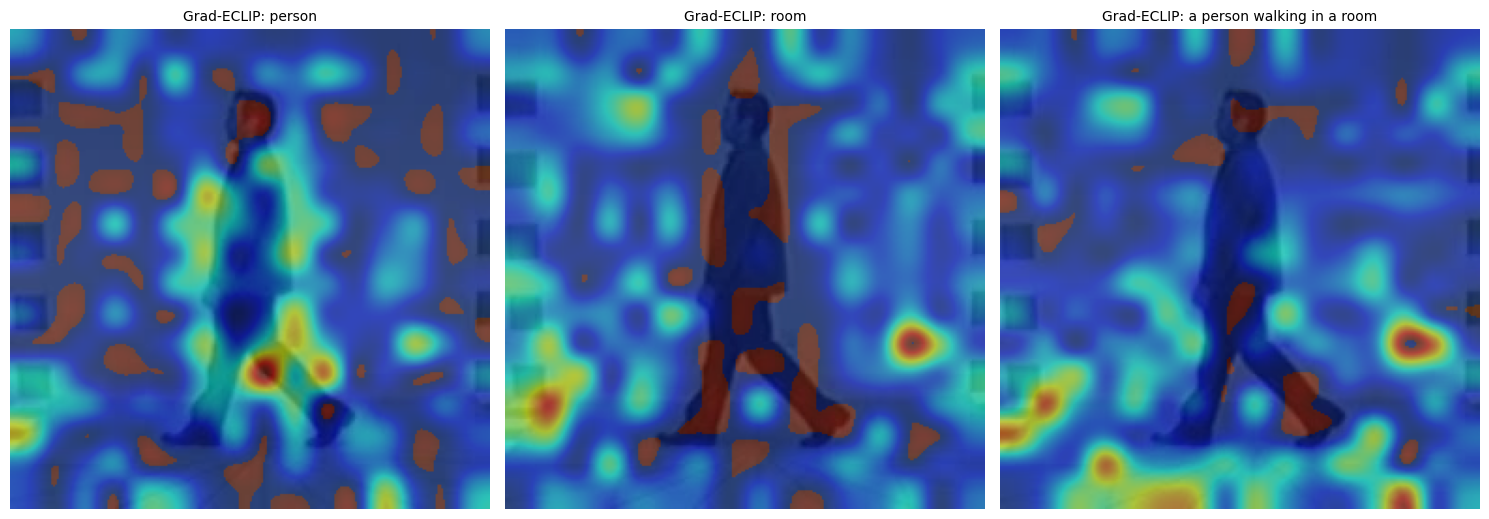

In [47]:

# Helper function to overlay heatmap
def visualize(map_tensor, img, resize_transform):
    # map_tensor: [H, W] tensor
    # Resize map to match original image dimensions
    # Ensure it's on CPU and converted to numpy
    map_np = resize_transform(map_tensor.unsqueeze(0)).squeeze(0).numpy()

    # Normalize to 0-255
    map_np = (map_np * 255).astype(np.uint8)

    # Apply Colormap
    heatmap = cv2.applyColorMap(map_np, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Overlay
    img_np = np.array(img)
    result = cv2.addWeighted(img_np, 0.5, heatmap, 0.5, 0)
    return result

# Generate Grad-ECLIP maps
grad_emaps = []
for i, c in enumerate(cosine):
    # Ensure we use the Grad-ECLIP function
    grad_emaps.append(grad_eclip(c, qs, ks, vs, atten_outs, map_size))

print("Visualizing Grad-ECLIP for prompts:", texts)
h, w = img.size
# Use Bicubic for smoother heatmap results
resize = T.Resize((w, h), interpolation=InterpolationMode.BICUBIC)

# Setup Plotting
num_prompts = len(cosine)
fig, axs = plt.subplots(ncols=num_prompts, nrows=1, figsize=(15, 6))

# Ensure axs is iterable even if there is only 1 prompt
if num_prompts == 1:
    axs = [axs]

# Visualization Loop
for i, ax in enumerate(axs):
    # --- Process Grad-ECLIP Map ---
    tmp_e = grad_emaps[i].clone().detach().cpu()
    tmp_e -= tmp_e.min()
    # Add epsilon to avoid division by zero
    tmp_e /= (tmp_e.max() + 1e-8)

    # Generate the blended image
    c_ret_e = visualize(tmp_e, img, resize)

    # Plotting
    ax.axis('off')
    ax.set_title(f"Grad-ECLIP: {texts[i]}", fontsize=10)
    ax.imshow(c_ret_e)

fig.tight_layout()
plt.show()

# Free up GPU memory
torch.cuda.empty_cache()